In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv(r'E:/통합_신체정보데이터.csv')
df

,model_num,height,weight,body_fat,waist,belly_waist,hip,thigh,bust,arm,shoulder,insim,gender,age,body_shape
0,F004,164.1,49.4,21.8,64.1,67.2,87.8,50.3,80.5,24.8,33.5,75.4,F,30,모래시계형 (Hourglass)
1,F005,152.9,51.9,24.2,66.2,79.2,90.5,55.0,80.5,29.2,33.1,63.3,F,44,배형 (Belly)
2,F006,159.7,47.6,20.0,64.4,74.5,87.3,47.6,79.5,25.1,32.1,66.5,F,50,배형 (Belly)
3,F007,162.2,59.1,27.8,74.8,82.3,92.1,52.2,93.0,26.7,33.6,70.6,F,42,배형 (Belly)
4,F008,157.6,61.6,36.4,82.6,89.0,92.2,51.5,99.7,29.0,36.6,66.6,F,65,사과형 (Apple)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,M499,169.9,65.2,17.8,81.8,82.0,87.0,48.4,92.7,29.3,39.1,69.1,M,53,사과형 (Apple)
988,M500,173.7,67.2,20.3,72.3,77.0,93.9,55.3,91.7,31.9,39.0,74.8,M,30,모래시계형 (Hourglass)
989,F013,152.0,74.0,50.5,99.7,104.8,105.4,64.4,101.9,32.8,33.8,65.0,F,50,사과형 (Apple)
990,F014,160.2,51.2,25.0,68.5,77.0,89.0,52.2,81.0,25.8,35.8,68.4,F,57,배형 (Belly)


In [3]:
df['body_shape'].value_counts()

사과형 (Apple)          368
배형 (Belly)           258
표준 체형 (Standard)     143
모래시계형 (Hourglass)     91
엉덩이형 (Pear)           80
하체형 (Lower-Body)      52
Name: body_shape, dtype: int64

In [5]:
df.isnull().count()

model_num      992
height         992
weight         992
body_fat       992
waist          992
belly_waist    992
hip            992
thigh          992
bust           992
arm            992
shoulder       992
insim          992
gender         992
age            992
body_shape     992
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   model_num    992 non-null    object 
 1   height       992 non-null    float64
 2   weight       992 non-null    float64
 3   body_fat     992 non-null    float64
 4   waist        992 non-null    float64
 5   belly_waist  992 non-null    float64
 6   hip          992 non-null    float64
 7   thigh        992 non-null    float64
 8   bust         992 non-null    float64
 9   arm          992 non-null    float64
 10  shoulder     992 non-null    float64
 11  insim        992 non-null    float64
 12  gender       992 non-null    object 
 13  age          992 non-null    int64  
 14  body_shape   992 non-null    object 
dtypes: float64(11), int64(1), object(3)
memory usage: 116.4+ KB


In [8]:
df.describe()

,height,weight,body_fat,waist,belly_waist,hip,thigh,bust,arm,shoulder,insim,age
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,164.776008,64.165590,28.475605,79.881534,84.350806,93.520565,55.030746,90.594450,29.858266,36.770636,71.975000,48.264113
std,8.552211,11.843903,7.038238,9.608344,8.334705,5.254304,6.337194,8.063852,2.954818,3.215853,5.415547,15.258645
min,142.300000,6.000000,8.200000,52.600000,63.300000,64.200000,34.800000,8.200000,18.500000,22.800000,7.000000,20.000000
25%,158.375000,55.100000,23.475000,72.700000,78.500000,90.000000,52.000000,86.000000,27.700000,34.000000,68.700000,35.000000
50%,164.250000,62.800000,28.900000,79.700000,84.000000,93.200000,54.200000,90.800000,29.800000,36.400000,71.800000,49.000000
75%,171.325000,71.825000,33.625000,86.425000,89.600000,96.700000,57.200000,95.300000,31.800000,39.400000,75.200000,61.000000
max,187.700000,113.800000,50.500000,116.500000,117.100000,112.700000,98.200000,116.500000,40.100000,53.200000,117.500000,80.000000


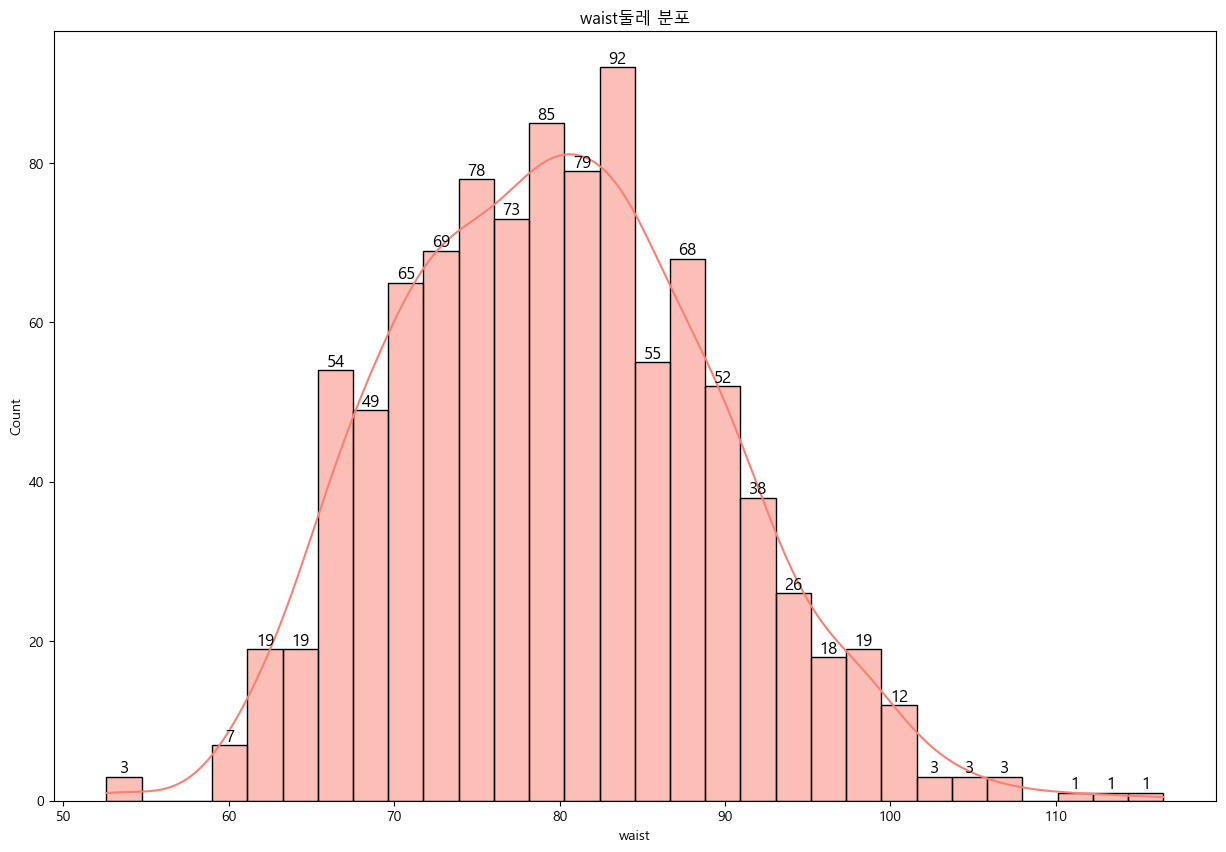

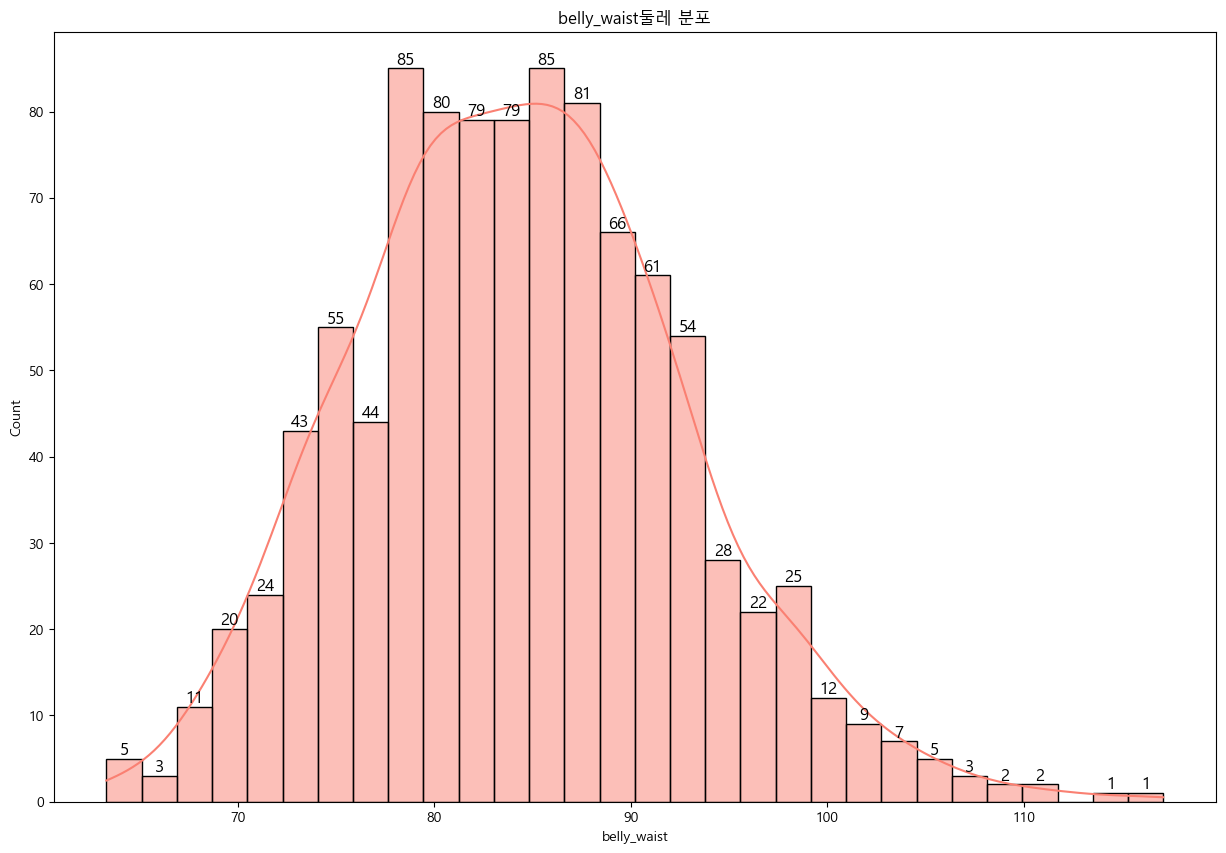

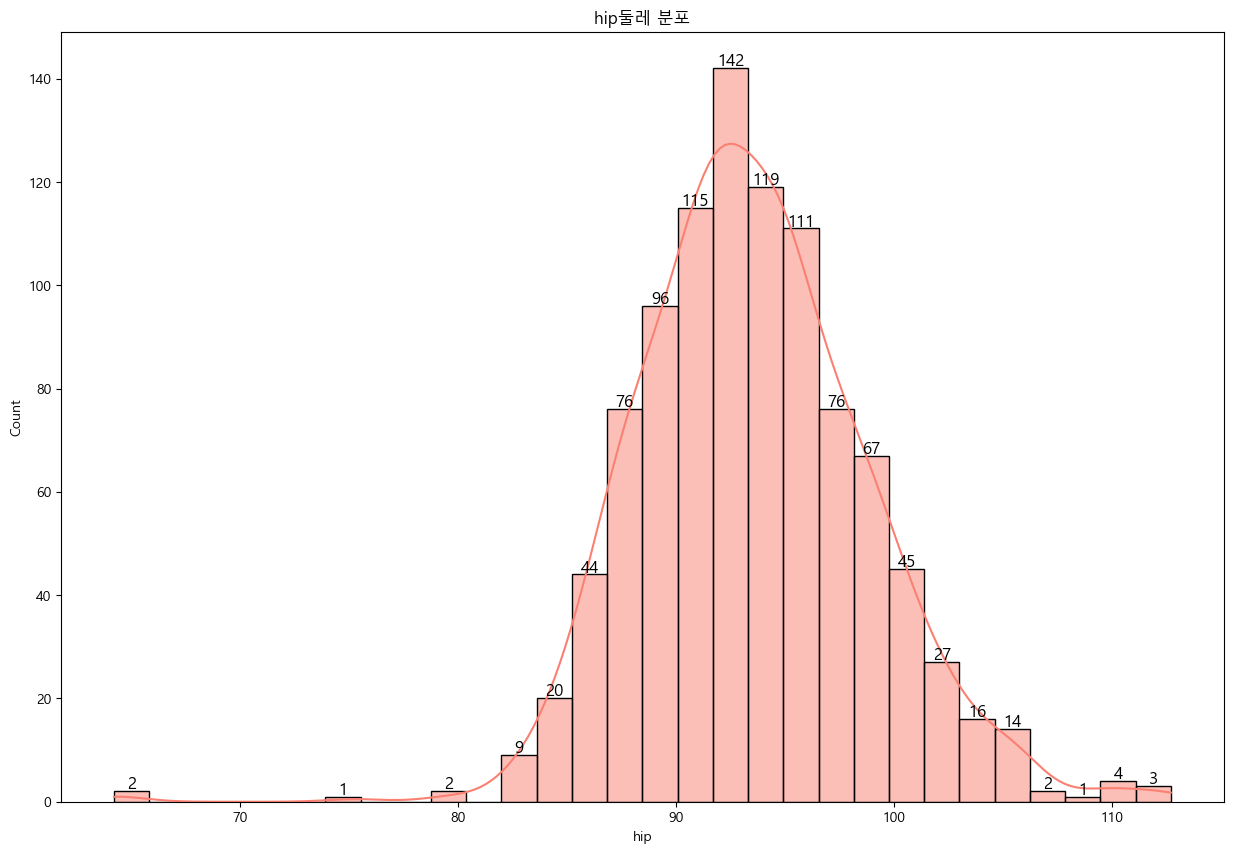

In [27]:
# 체형의 특징 별 중요부위 둘레 분포 
features = ['waist','belly_waist','hip']
for feature in features:
    plt.figure(figsize=(15,10))
    plt.rc('font', family='Malgun Gothic')
    ax = sns.histplot(df[feature],kde=True,bins=30,color='salmon')
    for patch in ax.patches:
        height = patch.get_height()
        if height > 0:  # 높이가 0보다 클 때만 표시
            plt.text(patch.get_x() + patch.get_width() / 2, height + 0.5, 
                     int(height), ha='center', fontsize=12, color='black')
    plt.title(f'{feature}둘레 분포')
    plt.show()

In [39]:
# 서브플롯 생성
fig, axes = plt.subplot(1,2,figsize=(20,8))

#체형별 부위별 둘레 평균 
sns.barplot(data= gender_mean, x = '')


TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 640x480 with 0 Axes>